In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

# 1. 분석 주제 및 목적
- 최근 뉴스에서는 지방에는 일할 사람이 없다는 말이 계속해서 나오는 중
- 하지만 지방에서 자란 친구들 중 졸업 후에도 고향 근처에서 취업을 해 살아가는 것을 선호하는 사람 多
- 언론에서 들리는 내용과 주변에서 들리는 내용의 차이가 존재해 어떤 상황인지 알아보기 위해 주제 선정

In [2]:
population = pd.read_csv("./data/경상남도_시군별 인구수 및 세대수_20240701.csv")
move_in = pd.read_csv("./data/경상남도_전입인구_20231231.csv")
move_out = pd.read_csv("./data/경상남도_전출인구_20231231.csv")
employment_rate = pd.read_csv("./data/청년고용률_20240630.csv")
unemployment_rate = pd.read_csv("./data/청년실업률_20240630.csv")

In [3]:
population.head()

,연월,행정동코드,연령대,성별코드,구분명,인구수
0,2024-01,1100000000,0,1,내국인,262001
1,2024-01,1100000000,10,1,내국인,374718
2,2024-01,1100000000,20,1,내국인,640896
3,2024-01,1100000000,30,1,내국인,713652
4,2024-01,1100000000,40,1,내국인,701808


In [4]:
move_in.head()

,연도,인구이동외부행정동코드,인구이동내부행정동코드,인구이동연령대코드,성별코드,사유코드,전입인구수
0,2023,4812125000,1100000000,3,1,1,1
1,2023,4812125000,1100000000,5,1,1,1
2,2023,4812125000,1100000000,1,1,2,1
3,2023,4812125000,1100000000,2,1,2,5
4,2023,4812125000,1100000000,3,1,2,1


In [5]:
move_out.head()

,연도,인구이동내부행정동코드,인구이동외부행정동코드,인구이동연령대코드,성별코드,사유코드,전출인구수
0,2023,1100000000,4812125000,3,1,1,4
1,2023,1100000000,4812125000,4,1,1,1
2,2023,1100000000,4812125000,6,1,1,1
3,2023,1100000000,4812125000,5,1,2,1
4,2023,1100000000,4812125000,2,1,3,2


In [6]:
employment_rate.head()

,행정동코드,청년고용률,분기
0,1000000000,46.1,20241
1,1100000000,53.3,20241
2,2600000000,45.2,20241
3,2700000000,38.2,20241
4,2800000000,45.2,20241


In [7]:
unemployment_rate.head()

,행정동코드,청년실업률,분기
0,1000000000,6.4,20241
1,1100000000,4.1,20241
2,2600000000,8.1,20241
3,2700000000,10.4,20241
4,2800000000,9.7,20241


In [8]:
age_code_dict = {
    1:	10,
    2:	20,
    3:	30,
    4:	40,
    5:	50,
    6:	60
}

reason_code_dict = {
    1: "직업",
    2: "가족",
    3: "주택",
    4: "교육",
    5: "주거환경",
    6: "자연환경",
    9: "기타"
}

area_code_dict = {
    1000000000: "전국",
    1100000000: "서울특별시",
    2600000000: "부산광역시",
    2700000000: "대구광역시",
    2800000000: "인천광역시",
    2900000000: "광주광역시",
    3000000000: "대전광역시",
    3100000000: "울산광역시",
    3600000000: "세종특별자치시",
    4100000000: "경기도",
    4200000000:	"강원도",
    4300000000: "충청북도",
    4400000000: "충청남도",
    4500000000: "전라북도",
    4600000000: "전라남도",
    4700000000: "경상북도",
    4800000000: "경상남도",
    5000000000: "제주특별자치도",
    5100000000: "강원특별자치도",
    5200000000: "전북특별자치도"
}

In [9]:
def trim_area_code(area_code):
    return (area_code//100000000)*100000000

def get_age(age_code):
    return age_code_dict[age_code]

def get_area(area_code):
    return area_code_dict[trim_area_code(area_code)]

def get_gender(gender_code):
    return "M" if gender_code == 1 else "F"

def get_reason(reason_code):
    return reason_code_dict[reason_code]

In [10]:
population['행정동'] = population['행정동코드'].apply(get_area)
population['성별'] = population['성별코드'].apply(get_gender)
population = population.drop(['행정동코드', '성별코드'], axis=1)
population.head()

,연월,연령대,구분명,인구수,행정동,성별
0,2024-01,0,내국인,262001,서울특별시,M
1,2024-01,10,내국인,374718,서울특별시,M
2,2024-01,20,내국인,640896,서울특별시,M
3,2024-01,30,내국인,713652,서울특별시,M
4,2024-01,40,내국인,701808,서울특별시,M


In [11]:
move_in['기존 지역'] = move_in['인구이동내부행정동코드'].apply(get_area)
move_in['이주 지역'] = move_in['인구이동외부행정동코드'].apply(get_area)
move_in['연령대'] = move_in['인구이동연령대코드'].apply(get_age)
move_in['성별'] = move_in['성별코드'].apply(get_gender)
move_in['사유'] = move_in['사유코드'].apply(get_reason)
move_in = move_in.drop(['인구이동외부행정동코드', '인구이동내부행정동코드', '인구이동연령대코드', '성별코드', '사유코드'], axis=1)
move_in.head()

,연도,전입인구수,기존 지역,이주 지역,연령대,성별,사유
0,2023,1,서울특별시,경상남도,30,M,직업
1,2023,1,서울특별시,경상남도,50,M,직업
2,2023,1,서울특별시,경상남도,10,M,가족
3,2023,5,서울특별시,경상남도,20,M,가족
4,2023,1,서울특별시,경상남도,30,M,가족


In [12]:
move_out['기존 지역'] = move_out['인구이동외부행정동코드'].apply(get_area)
move_out['이주 지역'] = move_out['인구이동내부행정동코드'].apply(get_area)
move_out['연령대'] = move_out['인구이동연령대코드'].apply(get_age)
move_out['성별'] = move_out['성별코드'].apply(get_gender)
move_out['사유'] = move_out['사유코드'].apply(get_reason)
move_out = move_out.drop(['인구이동외부행정동코드', '인구이동내부행정동코드', '인구이동연령대코드', '성별코드', '사유코드'], axis=1)
move_out.head()

,연도,전출인구수,기존 지역,이주 지역,연령대,성별,사유
0,2023,4,경상남도,서울특별시,30,M,직업
1,2023,1,경상남도,서울특별시,40,M,직업
2,2023,1,경상남도,서울특별시,60,M,직업
3,2023,1,경상남도,서울특별시,50,M,가족
4,2023,2,경상남도,서울특별시,20,M,주택


# 2. 분석 내용

### 경상남도 내의 청년은 줄어들고 있는가?

[Text(0, 0, '642,856'),
 Text(0, 0, '637,594'),
 Text(0, 0, '633,616'),
 Text(0, 0, '630,342'),
 Text(0, 0, '627,456'),
 Text(0, 0, '625,476')]

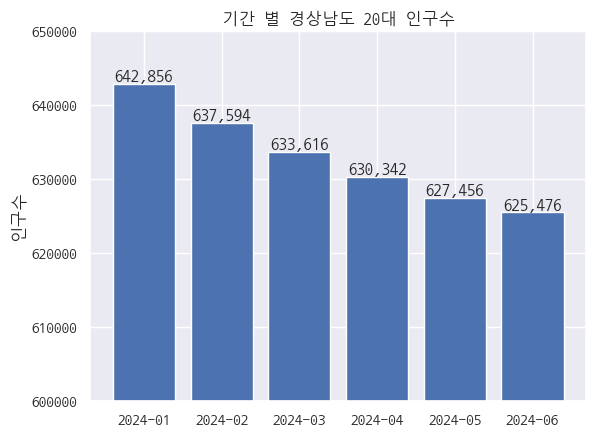

In [16]:
fig, ax = plt.subplots()
bar_container = ax.bar(['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06'], [population[(population['연령대'] == 20) & (population['행정동'] == "경상남도") & (population['연월'] == month)]['인구수'].sum() for month in ['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06']])
ax.set(ylabel='인구수', title='기간 별 경상남도 20대 인구수', ylim=(600000, 650000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 기간별 경상남도 20대 인구수를 보면 매달 3,000~5,000명씩 줄어들고 있음
- 6개월간 17,000명가량 줄어들었는데 이는 전체 비율 중 약 2.6%에 해당
- 6개월 만에 상당히 많은 청년 인구 감소

### 그렇다면 수도권의 청년들은 늘어나고 있는가?

[Text(0, 0, '3,029,061'),
 Text(0, 0, '3,021,969'),
 Text(0, 0, '3,015,475'),
 Text(0, 0, '3,006,805'),
 Text(0, 0, '2,997,009'),
 Text(0, 0, '2,988,586')]

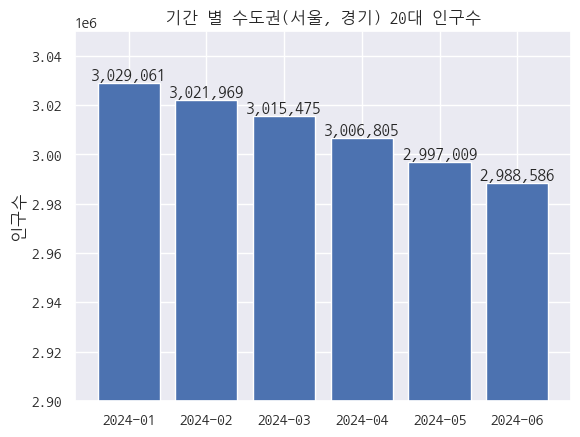

In [17]:
fig, ax = plt.subplots()
bar_container = ax.bar(['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06'], [population[(population['연령대'] == 20) & (population['행정동'].isin(["서울특별시", "경기도"])) & (population['연월'] == month)]['인구수'].sum() for month in ['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06']])
ax.set(ylabel='인구수', title='기간 별 수도권(서울, 경기) 20대 인구수', ylim=(2900000, 3050000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 수도권의 청년 인구수는 늘어날 줄 알았으나 수도권도 인구 감소

In [ ]:
pd.DataFrame({"지역": move_in['기존 지역'].unique(), "전입인구수": [move_in[(move_in['연령대'] == 20) & (move_in['기존 지역'] == area)]['전입인구수'].sum() for area in move_in['기존 지역'].unique()]}).sort_values(by="전입인구수", ascending=False)

### 그렇다면 청년들은 과연 어디로 갈까?

[Text(0, 0, '38,124'),
 Text(0, 0, '14,003'),
 Text(0, 0, '5,586'),
 Text(0, 0, '8,508'),
 Text(0, 0, '3,029')]

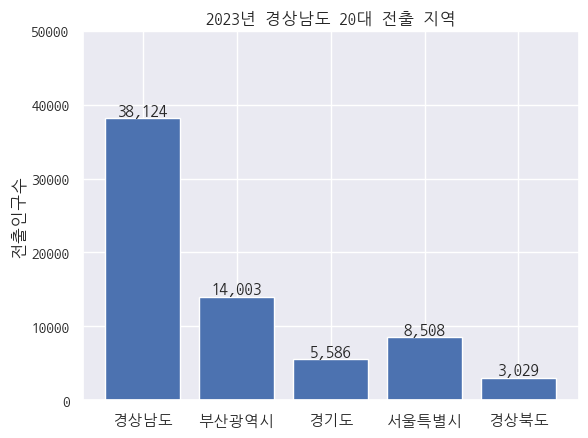

In [ ]:
top5_area = ["경상남도", "부산광역시", "경기도", "서울특별시", "경상북도"]
fig, ax = plt.subplots()
bar_container = ax.bar(top5_area, [move_out[(move_out['연령대'] == 20) & (move_out['이주 지역'] == area)]['전출인구수'].sum() for area in top5_area])
ax.set(ylabel='전출인구수', title='2023년 경상남도 20대 전출 지역', ylim=(0, 50000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 경상남도를 벗어나도 대부분 부산이나 경북 등 근처로 이동
- 대부분 경상권 내에서 이동하지만 서울 & 경기가 각각 3위와 4위를 차지
- 경상남도에서 서울이나 경기도 등 다른 도시로 가는 경우는 그렇게까지 많지는 않음
- 표에는 나오지 않았지만 6, 7위는 각각 대구와 울산으로 경상도를 벗어나는 것을 선호하지 않음

### 그렇다면 과연 왜 이동할까?

[Text(0, 0, '33,784'),
 Text(0, 0, '16,007'),
 Text(0, 0, '12,252'),
 Text(0, 0, '12,511'),
 Text(0, 0, '3,367'),
 Text(0, 0, '275'),
 Text(0, 0, '3,495')]

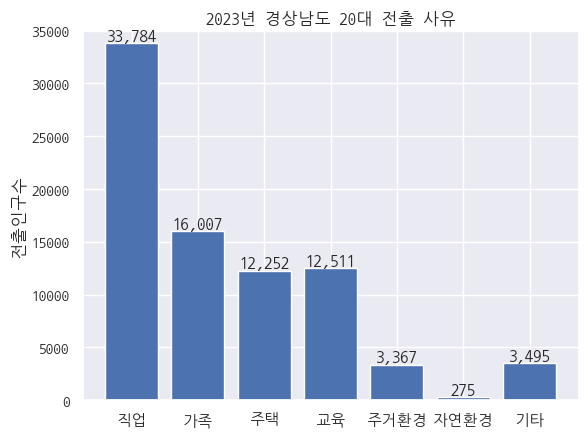

In [22]:
fig, ax = plt.subplots()
bar_container = ax.bar(["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"], [move_out[(move_out['연령대'] == 20) & (move_out['사유'] == reason)]['전출인구수'].sum() for reason in ["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"]])
ax.set(ylabel='전출인구수', title='2023년 경상남도 20대 전출 사유', ylim=(0, 35000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 대부분의 경우는 직업을 이유로 이동
- 20대 전체가 표본이다 보니 교육의 상당 부분은 대학교 진학이 차지할 것으로 예상

[Text(0, 0, '8,196'),
 Text(0, 0, '1,279'),
 Text(0, 0, '637'),
 Text(0, 0, '3,132'),
 Text(0, 0, '372'),
 Text(0, 0, '14'),
 Text(0, 0, '464')]

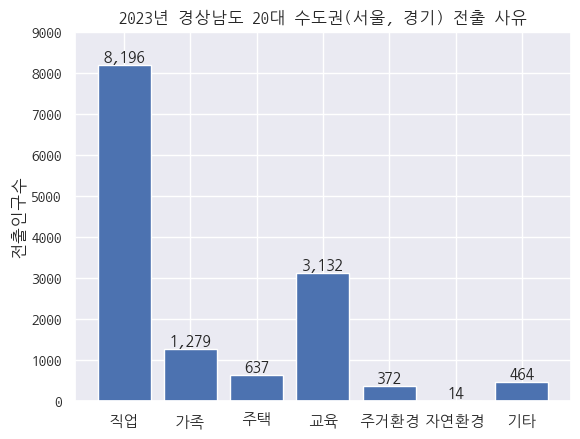

In [23]:
fig, ax = plt.subplots()
bar_container = ax.bar(["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"], [move_out[(move_out['연령대'] == 20) & (move_out['사유'] == reason) & (move_out['이주 지역'].isin(['경기도','서울특별시']))]['전출인구수'].sum() for reason in ["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"]])
ax.set(ylabel='전출인구수', title='2023년 경상남도 20대 수도권(서울, 경기) 전출 사유', ylim=(0, 9000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 경상남도에 거주하던 20대가 수도권으로 이주한 사유 1위는 역시나 직업
- 경상남도 내 이주와 차이가 존재한다면 교육이 2순위로 나옴
- 위에서 예상한 대로 대학교 진학이 상당수를 차지하는 듯

### 그렇다면 지방에 있는 청년은 정말 일할 곳이 없을까?

[Text(0, 0, '46.6'),
 Text(0, 0, '50.9'),
 Text(0, 0, '46.6'),
 Text(0, 0, '41.1'),
 Text(0, 0, '37.6')]

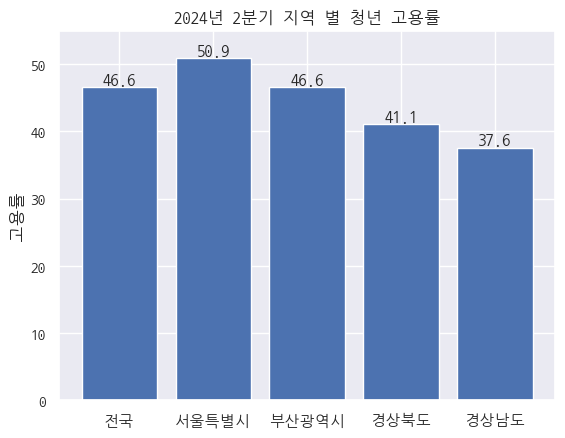

In [24]:
fig, ax = plt.subplots()
bar_container = ax.bar(["전국","서울특별시", "부산광역시", "경상북도", "경상남도"], employment_rate[(employment_rate['분기']==20242) & (employment_rate['지역'].isin(["전국","서울특별시", "부산광역시", "경상북도", "경상남도"]))]['청년고용률'])
ax.set(ylabel='고용률', title='2024년 2분기 지역 별 청년 고용률', ylim=(0, 55))
ax.bar_label(bar_container, fmt='{:,.1f}')

[Text(0, 0, '6.6'),
 Text(0, 0, '5.8'),
 Text(0, 0, '6.6'),
 Text(0, 0, '8.1'),
 Text(0, 0, '4.9')]

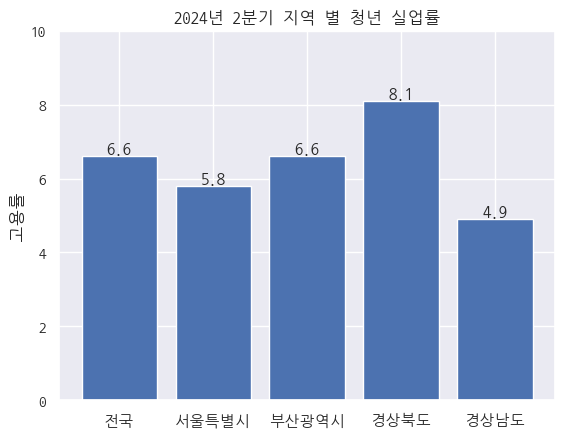

In [25]:
fig, ax = plt.subplots()
bar_container = ax.bar(["전국","서울특별시", "부산광역시", "경상북도", "경상남도"], unemployment_rate[(unemployment_rate['분기']==20242) & (unemployment_rate['지역'].isin(["전국","서울특별시", "부산광역시", "경상북도", "경상남도"]))]['청년실업률'])
ax.set(ylabel='고용률', title='2024년 2분기 지역 별 청년 실업률', ylim=(0, 10))
ax.bar_label(bar_container, fmt='{:,.1f}')

- 지역별 청년 고융률을 보면 전국 평균은 **46.6**%인데 비해 경상남도는 **37.6**%으로 **9**%나 낮음
- 그에 반해 서울은 **50.9**%로 경상남도와 **13**%가 넘게 차이가 남
- 다른 지역과 비교해 봐도 부산과 경북에 비해 현저히 낮음
- 따라서 일자리를 찾아 경상도 내에서의 이주 정도는 자주 하는 것 같음


### 그렇다면 지방으로 오는 청년은 없을까?

[Text(0, 0, '38,124'),
 Text(0, 0, '11,186'),
 Text(0, 0, '3,908'),
 Text(0, 0, '3,357'),
 Text(0, 0, '2,373')]

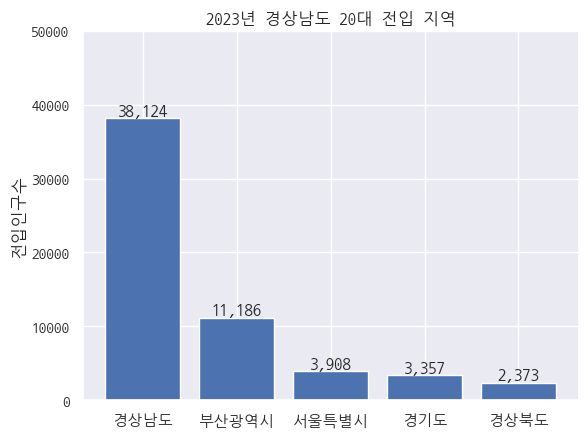

In [ ]:
top5_area = ["경상남도", "부산광역시", "서울특별시", "경기도", "경상북도"]
fig, ax = plt.subplots()
bar_container = ax.bar(top5_area, [move_in[(move_in['연령대'] == 20) & (move_in['기존 지역'] == area)]['전입인구수'].sum() for area in top5_area])
ax.set(ylabel='전입인구수', title='2023년 경상남도 20대 전입 지역', ylim=(0, 50000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 경상남도로 전입을 오는 사람의 수는 경상남도에서 전출을 나가는 사람에 비해 적음

[Text(0, 0, '68,426'), Text(0, 0, '81,691')]

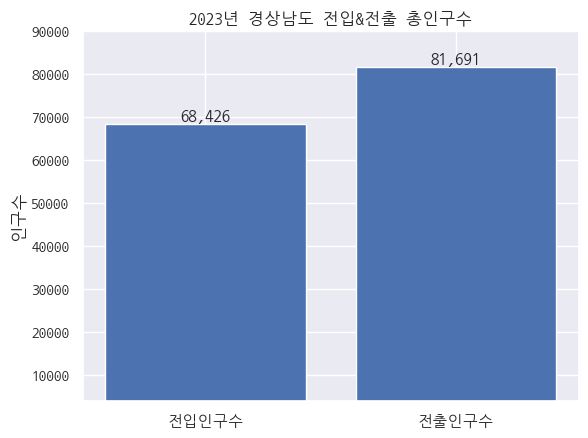

In [ ]:
fig, ax = plt.subplots()
bar_container = ax.bar(['전입인구수', '전출인구수'], [move_in[move_in['연령대'] == 20]['전입인구수'].sum(), move_out[move_out['연령대'] == 20]['전출인구수'].sum()])
ax.set(ylabel='인구수', title='2023년 경상남도 전입&전출 총인구수', ylim=(4000, 90000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 총 전입 & 전출인구 수를 보면 2023년 한 해 동안 약 **13,000명**의 20대가 경상남도를 벗어남
- 비율 상 이중 약 **53**%는 같은 경상권 내의 다른 도시, 약 **32**%는 수도권, 나머지는 그 외 지역으로 이동

### 그렇다면 지방으로 오는 이유는 뭘까?

[Text(0, 0, '22,562'),
 Text(0, 0, '21,850'),
 Text(0, 0, '11,938'),
 Text(0, 0, '5,782'),
 Text(0, 0, '2,603'),
 Text(0, 0, '417'),
 Text(0, 0, '3,274')]

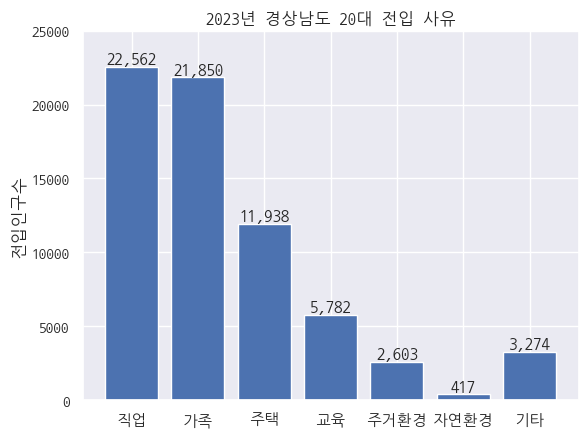

In [ ]:
fig, ax = plt.subplots()
bar_container = ax.bar(["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"], [move_in[(move_in['연령대'] == 20) & (move_in['사유'] == reason)]['전입인구수'].sum() for reason in ["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"]])
ax.set(ylabel='전입인구수', title='2023년 경상남도 20대 전입 사유', ylim=(0, 25000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 경상남도로 이주하는 사람들은 가족 때문에 오는 사람이 굉장히 많음

[Text(0, 0, '11,278'),
 Text(0, 0, '11,812'),
 Text(0, 0, '2,404'),
 Text(0, 0, '2,787'),
 Text(0, 0, '530'),
 Text(0, 0, '205'),
 Text(0, 0, '1,286')]

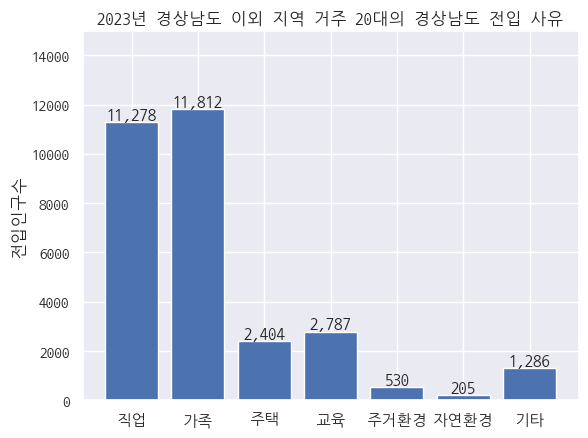

In [ ]:
fig, ax = plt.subplots()
bar_container = ax.bar(["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"], [move_in[(move_in['연령대'] == 20) & (move_in['기존 지역']!="경상남도") & (move_in['사유'] == reason)]['전입인구수'].sum() for reason in ["직업", "가족", "주택", "교육", "주거환경", "자연환경", "기타"]])
ax.set(ylabel='전입인구수', title='2023년 경상남도 이외 지역 거주 20대의 경상남도 전입 사유', ylim=(0, 15000))
ax.bar_label(bar_container, fmt='{:,.0f}')

- 이는 경상남도 이외 지역에서 경상남도로 오는 사람들로만 통계를 내면 더욱 두드러짐
- 이 경우에는 가족이 전입 사유 1위를 차지

### 결론

- 많은 청년들이 지방을 벗어나는 중
    - 정확히는 지방에서도 다소 낙후된 지역을 벗어나 조금이라도 더 발전한 지방으로 이동
- 하지만 지방으로 이주하는 사람들도 존재
    - 경상남도를 오는 경우는 가족과 근처에 지내고 싶어서 오는 경우가 굉장히 많음
    - 직업적으로는 그렇게까지 큰 메리트가 없는 것 같음
- 경상도 내의 청년들이 모두 수도권으로 모인다기보다는 경상도의 다른 지역 혹은 경상도 가까운 지역으로 더 나은 일자리를 찾아서 이전
    - 수도권 상경의 경우, 가족이나 인간관계 등의 이유로 쉽게 결정하지 못함
    - 위 내용은 주변 친구들의 사례와 일치
- 따라서 지방 전체가 소멸해 간다기보다는 지방에서도 다소 낙후된 지역이 소멸되어가는 과정
    - 위 내용도 뉴스에서 자주 등장하는 내용과 어느 정도 일치
    - 뉴스에서도 2040년 정도에는 부산을 제외한 지방은 소멸할 것이라고 함
- 비록 수도권에 거주 중이지만 지방 사람으로서 지방도 꼭 지역만의 특색을 살리며 유지할 수 있으면 좋겠음
    - 경상도 바닷가도 많고 생각보다 할 거 많아요. 많이 와주세요.
    - 울산은 오지 마세요. 울산 사람도 놀러 갈 때 부산가요

# 3. 데이터 출처 및 코드

- 경상남도 인구 데이터: [경남빅데이터허브플랫폼](https://bigdata.gyeongnam.go.kr/index.gn)
- 전국 청년 고용률 & 실업률: [공공데이터포털](https://www.data.go.kr/)